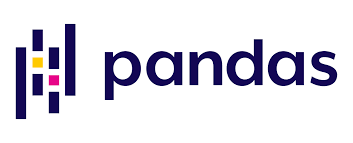

https://pandas.pydata.org/

Pandas data-manipulation capabilities are built on top of NumPy, utilizing its fast array processing, and its graphing capabilities are built on top of Matplotlib.

* "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

* It may be one of the most widely used tools for data munging

  * present data in nice formats
  * multiple convenient methods for filtering data
  * work with a variety of data formats (CSV, Excel, …)
  * convenient functions for quickly plotting data

* The name comes from panel data (and is also a play on python data analysis)

## EDA with Pandas

First:  import pandas so we can use all of its data structures and functions

In [ ]:
import pandas as pd

Use pandas to import the data from 'anscombe.csv' into a dataframe variable

In [ ]:
df = pd.read_csv('data/anscombe.csv')

There are several useful dataframe attributes and methods that will allow you to get summary info:
* `head(n)` : get the first n rows
* `tail(n)` : get the last n rows
* `columns` : column names
* `dtypes` : data types of the columns (dataframes can hold different datatypes in different columns
* `index` : information about the row indices (they don't have to be numerical)
* `shape` : the size of the dataframe in each dimension
* `info()` : a range of summary info that includes the above
* `describe()` : basic statistics about the data columns

Print the first 2 rows of the dataframe:

In [ ]:
df.head(2)

Print the last 2 rows of the dataframe:

In [ ]:
df.tail(2)

Print the number of rows and columns of the dataframe:

In [ ]:
df.shape

Print the column names of the dataframe:

In [ ]:
df.columns

Print the datatypes of each column:

In [ ]:
df.dtypes

Pandas datatypes are slightly different from the raw python datatypes. Check out the datatype table again:

<table class="table table-striped">
  <thead>
    <tr>
      <th>Pandas Type</th>
      <th>Native Python Type</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>object</td>
      <td>string</td>
      <td>The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).</td>
    </tr>
    <tr>
      <td>int64</td>
      <td>int</td>
      <td>Numeric characters. 64 refers to the memory allocated to hold this character.</td>
    </tr>
    <tr>
      <td>float64</td>
      <td>float</td>
      <td>Numeric characters with decimals. If a column contains numbers and NaNs, pandas will default to float64, in case your missing value has a decimal.</td>
    </tr>
    <tr>
      <td>datetime64, timedelta[ns]</td>
      <td>N/A (but see the <a href="http://doc.python.org/2/library/datetime.html">datetime</a> module in Python’s standard library)</td>
      <td>Values meant to hold time data. Look into these for time series experiments.</td>
    </tr>
  </tbody>
</table>

Print summary statistics about the dataframe:

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

Print the values that are in the 'dataset' column:

In [ ]:
df['dataset']

Use "loc" to print the first 10 rows:

In [ ]:
df.loc[0:9]

Use "loc" to print the values from the first 10 rows of the 'x' column:

In [ ]:
df.loc[0:9, 'x']

Use "loc" to print the rows for which `dataset` is equal to `III`:

In [ ]:
df.loc[df['dataset'] == 'III']

Make a line plot of y against x for dataset III:

In [ ]:
df.loc[df['dataset'] == 'III'].plot(x='x', y='y')

Make a scatter plot of y against x for dataset III:

In [ ]:
df.loc[df['dataset'] == 'III'].plot(x='x', y='y', kind='scatter')

Make scatter plots for the other 3 datasets:

In [ ]:
df.loc[df['dataset'] == 'I'].plot(x='x', y='y', kind='scatter')
df.loc[df['dataset'] == 'II'].plot(x='x', y='y', kind='scatter')
df.loc[df['dataset'] == 'IV'].plot(x='x', y='y', kind='scatter')

We're working with the datasets from Anscombe's quartet.  You can read about it [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

As a hint of some additional Python plotting capabilities, we're going to plot:
* a scatter plot of dataset I 
* a line plot of the linear regression line using the numpy and matplotlib packages
* add in some interactivity to cycle between all four datasets and additionally calculate summary statistics and plot histograms of each variable

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

df.loc[df['dataset'] == 'I'].plot(x='x', y='y', kind='scatter', color='black')

x = np.linspace(4,14,100)
y = 3 + 0.5*x

plt.plot(x,y,color='blue')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.title("Anscombe's data I",fontsize=16)

In [ ]:
def widgetanscombe(dataset='III'):
    fig,ax = plt.subplots(2,2,figsize=(8,8))

    x = df[df.dataset==dataset].x
    y = df[df.dataset==dataset].y

    ax[1,0].scatter(x, y)

    ax[0,0].hist(x, bins=10, rwidth=0.9)
    ax[1,1].hist(y, bins=10, rwidth=0.9, orientation='horizontal')

    ax[0,1].text(0.2,0.8,'x_mean = {:.2f}'.format(x.mean()))
    ax[0,1].text(0.2,0.7,'x_stddev = {:.2f}'.format(x.std()))
    ax[0,1].text(0.2,0.6,'y_mean = {:.2f}'.format(y.mean()))
    ax[0,1].text(0.2,0.5,'y_stddev = {:.2f}'.format(y.std()))
    ax[0,1].text(0.2,0.4,'corr = {:.2f}'.format(x.corr(y)))

    fig.show()
    
ipywidgets.interact(widgetanscombe, dataset=df.dataset.unique());

# End